## 手写数字识别

In [3]:
import numpy as np
import pandas as pd
from keras.datasets import mnist

(X_train_image,y_train_label), (X_test_image,y_test_label) = mnist.load_data()
print('数据集形状',X_train_image.shape)
print('第一个数字样本',X_train_image[0])
print('第一个数据样本的标签:',y_train_label[0])

数据集形状 (60000, 28, 28)
第一个数字样本 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 

### 数据格式转换

In [4]:
from keras.utils import to_categorical
X_train = X_train_image.reshape(60000,28,28,1) # 增加一个维度
X_test = X_test_image.reshape(10000,28,28,1)

y_train = to_categorical(y_train_label,10) # 标签转换为 One-hot 编码
y_test = to_categorical(y_test_label,10)

print('训练集张量形状：',X_train.shape)
print('第一个数据标签：',y_train[0])

训练集张量形状： (60000, 28, 28, 1)
第一个数据标签： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 选择CNN处理数字识别

In [6]:
from keras import models
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = models.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='rmsprop',loss="categorical_crossentropy",metrics=['accuracy'])

In [7]:
model.fit(X_train,y_train,validation_split=0.3,epochs=5,batch_size=128)

Epoch 1/5
329/329 [==============================] - 23s 70ms/step - loss: 0.8721 - accuracy: 0.8425 - val_loss: 0.1155 - val_accuracy: 0.9660
Epoch 2/5
329/329 [==============================] - 22s 68ms/step - loss: 0.1796 - accuracy: 0.9514 - val_loss: 0.0848 - val_accuracy: 0.9763
Epoch 3/5
329/329 [==============================] - 23s 69ms/step - loss: 0.1360 - accuracy: 0.9627 - val_loss: 0.0641 - val_accuracy: 0.9820
Epoch 4/5
329/329 [==============================] - 23s 68ms/step - loss: 0.1113 - accuracy: 0.9701 - val_loss: 0.0641 - val_accuracy: 0.9833
Epoch 5/5
329/329 [==============================] - 22s 68ms/step - loss: 0.0986 - accuracy: 0.9740 - val_loss: 0.0895 - val_accuracy: 0.9781


In [8]:
score = model.evaluate(X_test,y_test)
print('测试集准确率：',score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.0809 - accuracy: 0.9792
测试集准确率： 0.979200005531311


看预测结果

第一个数字的预测结果: [6.77739818e-15 2.39562467e-11 1.09490017e-09 1.79346329e-11
 2.01134387e-11 1.04797795e-17 4.16544827e-20 1.00000000e+00
 1.50138182e-14 1.07529832e-10]
转换格式后得到 7


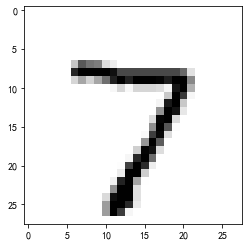

In [11]:
pred = model.predict(X_test[0].reshape(1,28,28,1))
print('第一个数字的预测结果:',pred[0])
print('转换格式后得到', pred.argmax()) # 将one-hot 编码转换为数字

import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape(28,28),cmap="Greys") #展示这个图片